# Home Assignment 2

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Prepare the data

In [61]:
df = pd.read_csv("Postures.csv")
print(f'DF shape: {df.shape}')
df.head()

DF shape: (78096, 38)


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


Eliminate the first row, as it has only zeroes

In [62]:
df.drop(index=0, inplace=True)

In [63]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [64]:
df['Class'].value_counts().to_frame().T # the dataset is fairly balanced

Class,3,1,5,2,4
count,16344,16265,15733,14978,14775


Split the data into training and testing sets:

In [65]:
X, y = df.drop(columns='Class'), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1.2 Data Transformation and Encoding

Mark missing data as NaN, so it is easier to handle than '?'

In [66]:
X_train, X_test = X_train.replace("?", pd.NA), X_test.replace("?", pd.NA)

Convert the data type of all columns (excluding 'User') to Float64. Using Float64 allows for NaN values, facilitating smoother data scaling processes.

In [67]:
columns_to_update_dtype = list(X_train.columns)
columns_to_update_dtype.remove('User')

X_train[columns_to_update_dtype] = X_train[columns_to_update_dtype].astype(dtype='Float64')
X_test[columns_to_update_dtype] = X_test[columns_to_update_dtype].astype(dtype='Float64')

Changing the 'User' column to a categorical data type and performing one-hot encoding is done to treat 'User' as a categorical variable rather than numerical. This avoids misleading ordinal assumptions. By performing one-hot encoding after splitting the dataset, we ensure consistency in encoding across training and testing sets, preventing potential data leakage and aligning with best practices.

In [68]:
# Number of instances per user
df['User'].value_counts().sort_index().to_frame().T

User,0,1,2,4,5,6,7,8,9,10,11,12,13,14
count,9048,4717,4513,379,5105,4377,492,6811,3920,9573,8061,4865,8739,7495


In [69]:
# Type of data in column User
df['User'].dtype

dtype('int64')

In [70]:
# Convert the User column to a categorical column (in X_train and X_test)
X_train['User'] = X_train['User'].astype('category')
X_test['User'] = X_test['User'].astype('category')

# One-hot encode the User column (in X_train and X_test)
X_train = pd.get_dummies(X_train, columns=['User'], prefix='User')
X_test = pd.get_dummies(X_test, columns=['User'], prefix='User')

Finding if there are any outliers in the data and removing them if needed can be done using the boxplot. The boxplot shows that there are no outliers in the data.

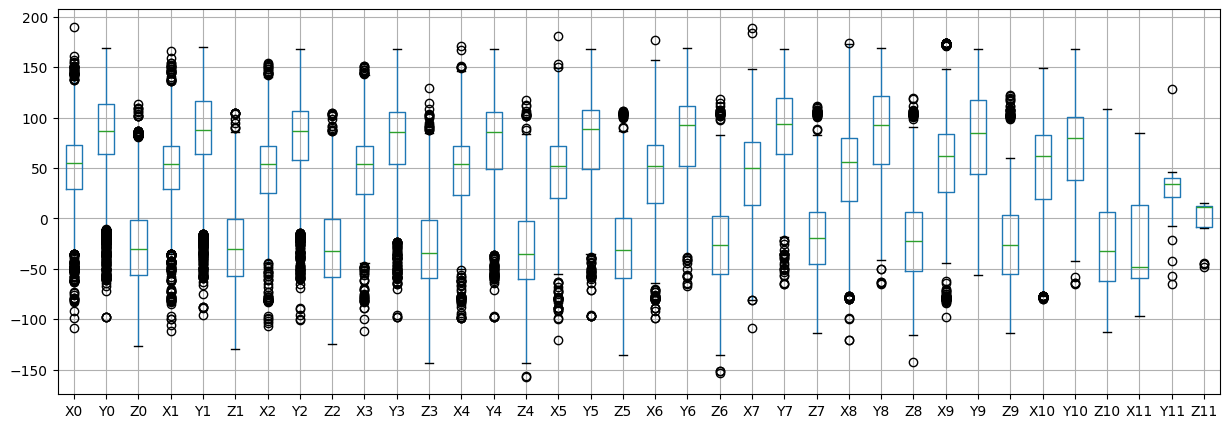

In [71]:
# Finding outliers - Boxplot of the columns except the last 14 (the User columns)
X_train.iloc[:, :-14].boxplot(figsize=(15, 5))
plt.show()

Dimensionality Reduction can be considered to reduce the number of features in the dataset. This can be done using PCA or LDA. However, since the number of features is already small, we will not be performing dimensionality reduction.

### 1.3 Data Scaling

To ensure the best performance of models, we will test two different scaling approaches: normalization and standartisation. 

Apply normalization and standartization:

In [72]:
#TODO: Scale the training set and apply the same scaler to the test dataset

## NORMALISATION
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = pd.DataFrame(norm.transform(X_train), columns=X_train.columns)
# transform testing data
X_test_norm = pd.DataFrame(norm.transform(X_test), columns=X_test.columns)

## STANDATISATION
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# numerical features
num_cols = df.iloc[:, 2:]

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

### 1.4 Handle missing values

In [73]:
def display_percentage_of_missing_values(X):
    missing_values_percentage = (X.isna().mean() * 100).round(2).astype(str) + '%'
    return missing_values_percentage.to_frame().T

In [74]:
# Percentage of missing values in each column in the training set
display_percentage_of_missing_values(X_train)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.88%,0.88%,0.88%,4.07%,4.07%,4.07%,16.78%,16.78%,16.78%,33.19%,33.19%,33.19%,50.09%,50.09%,50.09%,60.86%,60.86%,60.86%,69.28%,69.28%,69.28%,81.04%,81.04%,81.04%,99.96%,99.96%,99.96%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [75]:
# all instances lacking values for X3 were also missing all other values in subsequnet columns
display_percentage_of_missing_values(X_train[X_train['X3'].isna()])

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [76]:
# all instances lacking values for X4 were also missing all other values in subsequnet columns
X_tmp = X_train.dropna(subset=['X3'])
display_percentage_of_missing_values(X_tmp[X_tmp['X4'].isna()])

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,User_0,User_1,User_2,User_4,User_5,User_6,User_7,User_8,User_9,User_10,User_11,User_12,User_13,User_14
0,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


We initially examined the columns `X3`, `Y3`, and `Z3`, each of which had a minimal percentage of missing values (<1%). We analysed all the rows where `X3` values were missing. We discovered that all instances lacking values for X3 were also missing all other values in subsequnet columns. 

We observed the same trend in the following columns. For each subsequent column all the rows with missing values were also missing values for all subsequent columns.
Eventually, we decided to impute missing values accordingly:
- for columns [X,Y,Z] 3 and 4 - delete the rows with missing values, as they have most of the attribute values missing and account for a small percentage of data (4%).
- for the columns [X,Y,Z] 5 and 6  - impute with median values
- for columns  [X,Y,Z] 7, 8, 9, 10 - impute with model predictions
- for columns [X,Y,Z] 11 - remove those columns, as they have almost all values missing (99.96%)

In [92]:
def generate_column_names(column_indices):
    return np.array([[f'X{i}',f'Y{i}',f'Z{i}'] for i in column_indices]).flatten().tolist()


class MissingDataImputer:
    def __init__(self, 
                columns_to_remove_rows_if_missing_value=[],
                columns_to_impute_with_median=[],
                columns_to_impute_with_knn=[],
                columns_to_drop=[]):
        self.columns_to_remove_rows_if_missing_value = generate_column_names(columns_to_remove_rows_if_missing_value)
        self.columns_to_impute_with_median = generate_column_names(columns_to_impute_with_median)
        self.columns_to_impute_with_knn = generate_column_names(columns_to_impute_with_knn)
        self.columns_to_drop = generate_column_names(columns_to_drop)

    def impute(self, X, y):
        X = X.copy()
        y = y.copy()

        # remove all instances for which the values for `columns_to_remove_rows` columns are missing
        if len(self.columns_to_remove_rows_if_missing_value) > 0:
            X = X.dropna(subset=self.columns_to_remove_rows_if_missing_value)
            y = y.loc[X.index] # leave only the relevant rows in y

        # impute `columns_to_impute_with_median` columns with median
        if len(self.columns_to_impute_with_median) > 0:
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
            X[self.columns_to_impute_with_median] = median_imputer.fit_transform(X[self.columns_to_impute_with_median])

        # impute `columns_to_impute_with_knn` columns with knn classsifier
        if len(self.columns_to_impute_with_knn) > 0:
            knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
            X[self.columns_to_impute_with_knn] = knn_imputer.fit_transform(X[self.columns_to_impute_with_knn])

        # drop `columns_to_drop` columns
        if len(self.columns_to_drop) > 0:
            X = X.drop(columns=self.columns_to_drop)
        return X, y


In [93]:
imputer_sophisticated_1 = MissingDataImputer(
    columns_to_remove_rows_if_missing_value=[3,4],
    columns_to_impute_with_median=[5,6],
    columns_to_impute_with_knn=[7,8,9],
    columns_to_drop=[10,11])

imputer_sophisticated_2 = MissingDataImputer(
    columns_to_remove_rows_if_missing_value=[3,4],
    columns_to_impute_with_median=[5,6],
    columns_to_impute_with_knn=[7,8,9,10],
    columns_to_drop=[11])

# imputer_sophisticated_3 = MissingDataImputer(
#     columns_to_remove_rows_if_missing_value=[3,4],
#     columns_to_impute_with_median=[5,6,7,8,9,10],
#     columns_to_drop=[11]) # drop depending on the outcome above - see whether it's better to delete 10 or keep

imputer_sophisticated_3 = MissingDataImputer(
    columns_to_remove_rows_if_missing_value=[3,4,5],
    columns_to_impute_with_median=[6,7,8,9],
    columns_to_drop=[10,11]
    )

imputer_simple_1 = MissingDataImputer(
    columns_to_impute_with_median=[3,4,5,6,7,8,9,10,11],
    )


In [80]:
X_train_sophisticated_1, y_train_sophisticated_1 = imputer_sophisticated_1.impute(X_train, y_train)
X_test_sophisticated_1, y_test_sophisticated_1 = imputer_sophisticated_1.impute(X_test, y_test)

In [82]:
X_train_sophisticated_2, y_train_sophisticated_2 = imputer_sophisticated_2.impute(X_train, y_train)
X_test_sophisticated_2, y_test_sophisticated_2 = imputer_sophisticated_2.impute(X_test, y_test)

In [91]:
X_train_sophisticated_3, y_train_sophisticated_3 = imputer_sophisticated_3.impute(X_train, y_train)
X_test_sophisticated_3, y_test_sophisticated_3 = imputer_sophisticated_3.impute(X_test, y_test)

In [94]:
X_train_simple_1, y_train_simple_1= imputer_simple_1.impute(X_train, y_train)
X_test_simple_1, y_test_simple_1 = imputer_simple_1.impute(X_test, y_test)

Table with all the data sets (train, test, validation) with different modifications

In [108]:
# Dictionaries of datasets and models - TEMPLATE [NO REAL DATA] - To be used in the model loops
X_trains = {"Sophisticated_imputation_1": X_train_sophisticated_1, "Sophisticated_imputation_2": X_train_sophisticated_2,"Sophisticated_imputation_3": X_train_sophisticated_3,"Simple_imputation_1": X_train_simple_1}
y_trains = {"Sophisticated_imputation_1": y_train_sophisticated_1, "Sophisticated_imputation_2": y_train_sophisticated_2,"Sophisticated_imputation_3": y_train_sophisticated_3,"Simple_imputation_1": y_train_simple_1}
X_tests = {"Sophisticated_imputation_1": X_test_sophisticated_1, "Sophisticated_imputation_2": X_test_sophisticated_2,"Sophisticated_imputation_3": X_test_sophisticated_3,"Simple_imputation_1": X_test_simple_1}
y_tests = {"Sophisticated_imputation_1": y_test_sophisticated_1, "Sophisticated_imputation_2": y_test_sophisticated_2,"Sophisticated_imputation_3": y_test_sophisticated_3,"Simple_imputation_1": y_test_simple_1}

FOR GROUP: I made a small modification, so it is a bit easier to add new dataset_variants, but works the same as the previous version. But to make it even more clear, I would make a dataframe with several columns, e.g.: model, normalization type, imputation type, accuracy. For this variables we need a list of available values.

In [117]:
data_scalling_variants = {"Normalization": [], "Standardization": []}

# Dictionaries of datasets and models - TEMPLATE [NO REAL DATA] - To be used in the model loops
dataset_variants = {
    "Sophisticated_imputation_1": [X_train_sophisticated_1, y_train_sophisticated_1, X_test_sophisticated_1, y_test_sophisticated_1],
    "Sophisticated_imputation_2": [X_train_sophisticated_2, y_train_sophisticated_2, X_test_sophisticated_2, y_test_sophisticated_2],
    "Sophisticated_imputation_3": [X_train_sophisticated_3, y_train_sophisticated_3, X_test_sophisticated_3, y_test_sophisticated_3],
    "Simple_imputation_1": [X_train_simple_1, y_train_simple_1, X_test_simple_1, y_test_simple_1],
}

X_trains = {key: values[0] for key, values in dataset_variants.items()}
y_trains = {key: values[1] for key, values in dataset_variants.items()}
X_tests = {key: values[2] for key, values in dataset_variants.items()}
y_tests = {key: values[3] for key, values in dataset_variants.items()}

## 2. Classification

In [118]:
# Empty dataFrame that will have all the results - to be printed at the end
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

### 2.1 Linear models


In [119]:
# Linear regression

for version in X_trains.keys():  # for each version of the dataset
    lr = LogisticRegression(random_state=42, max_iter=1000)  # create the model
    lr.fit(X_trains[version], y_trains[version])  # train the model
    y_pred = lr.predict(X_tests[version])  # predict the test set
    accuracy = accuracy_score(y_tests[version], y_pred)  # calculate the accuracy
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [f'Logistic Regression_{version}'], 'Accuracy': [accuracy]})],
                           ignore_index=True)

c:\Users\karin\.Studia\Sem2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karin\AppData\Local\Temp\ipykernel_10524\1080982405.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Model': [f'Logistic Regression_{version}'], 'Accuracy': [accu

### 2.2 Tree Based models

In [120]:
# Tree classifier
for version in X_trains.keys():  # loop over the different versions of the datasets
    tree = DecisionTreeClassifier(random_state=42)  # initialize the model
    tree.fit(X_trains[version], y_trains[version])  # fit the model
    y_pred = tree.predict(X_tests[version])  # predict
    accuracy = accuracy_score(y_tests[version], y_pred)  # Evaluate the model
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [f'Decision Tree_{version}'], 'Accuracy': [accuracy]})],
                           ignore_index=True)


### 2.3 Naive Bayes

In [121]:
# Naive Bayes

for version in X_trains.keys():  # loop over the different versions of the datasets
    gnb = GaussianNB()  # initialize the model
    gnb.fit(X_trains[version], y_trains[version])  # fit the model
    y_pred = gnb.predict(X_tests[version])  # predict
    accuracy = accuracy_score(y_tests[version], y_pred)  # Evaluate the model
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [f'Naive Bayes_{version}'], 'Accuracy': [accuracy]})],
                           ignore_index=True)

### 2.4 K-Nearest Neighbours

In [122]:
# KNN

for version in X_trains.keys():  # loop over the different versions of the datasets
    knn = KNeighborsClassifier()  # Initialize the model
    knn.fit(X_trains[version], y_trains[version])  # Fit the model
    y_pred = knn.predict(X_tests[version])  # Make predictions
    accuracy = accuracy_score(y_tests[version], y_pred)  # Calculate accuracy
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [f'KNN_{version}'], 'Accuracy': [accuracy]})],
                           ignore_index=True)


## 3. Results

In [123]:
print(results_df)

                                             Model  Accuracy
0   Logistic Regression_Sophisticated_imputation_1  0.776412
1   Logistic Regression_Sophisticated_imputation_2  0.785087
2   Logistic Regression_Sophisticated_imputation_3  0.821238
3          Logistic Regression_Simple_imputation_1  0.558799
4         Decision Tree_Sophisticated_imputation_1  0.572143
5         Decision Tree_Sophisticated_imputation_2  0.610570
6         Decision Tree_Sophisticated_imputation_3  0.442403
7                Decision Tree_Simple_imputation_1  0.376511
8           Naive Bayes_Sophisticated_imputation_1  0.404439
9           Naive Bayes_Sophisticated_imputation_2  0.411038
10          Naive Bayes_Sophisticated_imputation_3  0.462245
11                 Naive Bayes_Simple_imputation_1  0.192174
12                  KNN_Sophisticated_imputation_1  0.906115
13                  KNN_Sophisticated_imputation_2  0.903986
14                  KNN_Sophisticated_imputation_3  0.908935
15                      